# Prøveeksamen

Steen Bender 06. Januar 2025

In [2]:
# Import stuff for code
import numpy as np
import pandas as pd
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sp
from usefull_functions import *

mpl.rcParams["font.size"] = 22

### Oppgave 1 Ligevægt - 24 point

En $10 mL$ opløsning af en blanding af metaller tilsættes $90 mL$ $1,000 M$ natriumhydrogensulfid.

Bemærk at hydrogensulfid reagerer er en amfolyt (amphoteric) med syrekonstanterne $K_{A^{’}} = 1,0·10^{-7} M$ og $K_{A^{’’}} = 1,0·10^{-19} M$ ved $25°C$, hvor vands ionprodukt er $KV = 1,0·10^{-14} M^2$. 
Blandingen kan indeholde:
Bi(III), Cd(II), Cu(II), Pb(II), Mn(II), Ni(II), Pd(II), Pt(II), Ag(I) og Sn(II).



|$K_{sp}$| stof |
|---|---|
| $1,82·10^{-99} M^5$ | $Bi_2S_3$ |
| $1,4·10^{-29} M^2$ | $CdS$ |
| $1,27·10^{-36} M^2$ | $CuS$ |
| $9,04·10^{-29} M^2$ | $PbS$ |
| $4,65·10^{-14} M^2$ | $MnS$ |
| $1,07·10^{-21} M^2$ | $NiS$ |
| $2,03·10^{-58} M^2$ | $PdS$ |
| $9,91·10^{-74} M^2$ | $PtS$ |
| $6,69·10^{-50} M^3$ | $Ag_2S$ |
| $3,25·10^{-28} M^2$ | $SnS$ |



#### a) Skriv Klokken
Trivielt

#### b) Beregn opløseligheden af sulfiderne s i 100 mL i molær og gram.

____


Las os opskrive mulige sulfid reaktioner:

<center>

$MS$

$K_{sp} = [M^{2+}][S^{2-}] = x * x = x^2$

$x = \sqrt{K_{sp}}$

$Bi_2S_3$

$K_{sp} = [Bi^{3+}]^2[S^{2-}]^3 = (2x)^2 * (3x)^3 = 108x^5$

$x = \sqrt[5]{\frac{K_{sp}}{108}}$

$Ag_2S$

$K_{sp} = [Ag^{+}]^2[S^{2-}] = (2x)^2 * x = 4x^3$

$x = \sqrt[3]{\frac{K_{sp}}{2}}$








In [3]:
salts_dict = {
    "Bi2S3": {"ksp_value": 1.82e-99, "type": "M2S3"},
    "CdS": {"ksp_value": 1.4e-29, "type": "MS"},
    "CuS": {"ksp_value": 1.27e-36, "type": "MS"},
    "PbS": {"ksp_value": 9.04e-29, "type": "MS"},
    "MnS": {"ksp_value": 4.65e-14, "type": "MS"},
    "NiS": {"ksp_value": 1.07e-21, "type": "MS"},
    "PdS": {"ksp_value": 2.03e-58, "type": "MS"},
    "PtS": {"ksp_value": 9.91e-74, "type": "MS"},
    "Ag2S": {"ksp_value": 6.69e-50, "type": "M2S"},
    "SnS": {"ksp_value": 3.25e-28, "type": "MS"},
}

single_dict = {"salt": [], "type": [], "ksp": []}

for key in salts_dict:
    single_dict["salt"].append(key)
    single_dict["type"].append(salts_dict[key]["type"])
    single_dict["ksp"].append(salts_dict[key]["ksp_value"])

In [4]:
simple_salt = lambda x: np.sqrt(x)
bis = lambda x: (x / 108) ** (1 / 5)
ags = lambda x: (x / 2) ** (1 / 3)


def calc_s(row):
    if row["type"] == "MS":
        return simple_salt(row["ksp"])
    elif row["type"] == "M2S":
        return ags(row["ksp"])
    elif row["type"] == "M2S3":
        return bis(row["ksp"])
    else:
        return np.nan


ka_2mark = 1e-19
df = pd.DataFrame(single_dict)
df["M[g/mol]"] = [
    514.16,
    144.47,
    95.611,
    239.3,
    87.003,
    90.753,
    138.49,
    227.14,
    247.8,
    150.76,
]
df["s[M]"] = df.apply(calc_s, axis=1)
df["s[g/100 ml]"] = df["s[M]"] * df["M[g/mol]"] * 0.1
df["k[M]"] = ka_2mark / df["ksp"]
df.loc[df["type"] == "M2S3", "k[M]"] = None
df.loc[df["type"] == "M2S", "k[M]"] = None
df

,salt,type,ksp,M[g/mol],s[M],s[g/100 ml],k[M]
0,Bi2S3,M2S3,1.820000e-99,514.160,7.003732e-21,3.601039e-19,NaN
1,CdS,MS,1.400000e-29,144.470,3.741657e-15,5.405572e-14,7.142857e+09
2,CuS,MS,1.270000e-36,95.611,1.126943e-18,1.077481e-17,7.874016e+16
3,PbS,MS,9.040000e-29,239.300,9.507891e-15,2.275238e-13,1.106195e+09
4,MnS,MS,4.650000e-14,87.003,2.156386e-07,1.876120e-06,2.150538e-06
5,NiS,MS,1.070000e-21,90.753,3.271085e-11,2.968608e-10,9.345794e+01
6,PdS,MS,2.030000e-58,138.490,1.424781e-29,1.973179e-28,4.926108e+38
7,PtS,MS,9.910000e-74,227.140,3.148015e-37,7.150402e-36,1.009082e+54
8,Ag2S,M2S,6.690000e-50,247.800,3.222048e-17,7.984236e-16,NaN
9,SnS,MS,3.250000e-28,150.760,1.802776e-14,2.717865e-13,3.076923e+08


#### c) Opskriv en general ligevægten, der beskriver udfældningen af et metal fra opløsningen, der kan ses bort fra $K_{A^’}$
____

$HS^- = H^+ + S^{2-}; K_A = \frac{[H^+][S^{2-}]}{[HS^-]} = 10^{-19}$ 

$M^{2+} + S^{2-} = MS; K_{sp} = [M^{2+}][S^{2-}]$

$HS^- + M^{2+} = MS + H^+; K = \frac{[H^+][MS]}{[HS^-][M^{2+}]} = \frac{10^{-19}}{Ksp}$
____

#### d) Beregn ligevægtskonstanten for k, husk enheden.

____

Udregnet formel fra c) og indsat i tabel overfor
____

#### e) Omregn opløselighedsprodukterne KSP og ligevægtskonstanten for udfældning K til fri energi

____
$$\Delta G = -RTlnK$$

In [5]:
R = 8.314
T = 298.15
df["G(SP)[Kj]/mol"] = -R * T * np.log(df["ksp"]) / 1000
df["G(K)[Kj/mol]"] = -R * T * np.log(df["k[M]"]) / 1000
df

,salt,type,ksp,M[g/mol],s[M],s[g/100 ml],k[M],G(SP)[Kj]/mol,G(K)[Kj/mol]
0,Bi2S3,M2S3,1.820000e-99,514.160,7.003732e-21,3.601039e-19,NaN,563.577092,NaN
1,CdS,MS,1.400000e-29,144.470,3.741657e-15,5.405572e-14,7.142857e+09,164.689012,-56.242865
2,CuS,MS,1.270000e-36,95.611,1.126943e-18,1.077481e-17,7.874016e+16,204.884429,-96.438283
3,PbS,MS,9.040000e-29,239.300,9.507891e-15,2.275238e-13,1.106195e+09,160.065551,-51.619404
4,MnS,MS,4.650000e-14,87.003,2.156386e-07,1.876120e-06,2.150538e-06,76.098071,32.348075
5,NiS,MS,1.070000e-21,90.753,3.271085e-11,2.968608e-10,9.345794e+01,119.693817,-11.247670
6,PdS,MS,2.030000e-58,138.490,1.424781e-29,1.973179e-28,4.926108e+38,329.291038,-220.844892
7,PtS,MS,9.910000e-74,227.140,3.148015e-37,7.150402e-36,1.009082e+54,416.683920,-308.237773
8,Ag2S,M2S,6.690000e-50,247.800,3.222048e-17,7.984236e-16,NaN,280.673317,NaN
9,SnS,MS,3.250000e-28,150.760,1.802776e-14,2.717865e-13,3.076923e+08,156.893701,-48.447555


#### f) Beregn mængden af hvert metal der skal være til stede i den oprindelige prøve for at der observeres udfældning.

___

Ligevægt for udfældning:
$$ HS^- + M^{2+} = MS + H^+ $$
$$ K = \frac{[H^+]}{[HS^-][M^{2+}]}$$

Givet vi har en $[HS] = 0.9M$ og vi kan finde en pH værdi, kan vi finde $[H^+]$ og dermed $[M^{2+}]$

$$[M^{2+}] = \frac{[H^+]}{K[HS^-]}$$

pH findes ved at løse:
reaktionen:
$$ HS^- + H_2O \rightleftharpoons H_2S + OH^-$$
$$ K_b = \frac{[OH^-][H_2S]}{[HS^-]} = 10^{-7}; k_a = 10^{-7}$$

Finde concentration af $OH^-$:

<center>

|stof | $HS^-$ | $H_2O$ | $H_2S$ | $OH^-$ |
|---|---|---|---|---|
|start | 0.9 | - | 0 | 0 |
|ændring | -x | -x | x | x |
|ligevægt | 0.9-x | - | x | x |
</center>

$$K_b = \frac{x^2}{0.9-x} = 10^{-7}$$

$$ x = 0.0002995 = [OH^-]$$

$$pOH = -log_{10}(0.0002995) = 3.5236$$

$$pH = 14 - 3.5236 = 10.476$$

Med noget dårligt afrunding for vi den samme 10.4 som i løsnings forslaget

$$[H^+] = 10^{-10.476} = 3.34 * 10^{-11}$$

$$[M^{2+}] = \frac{3.34 * 10^{-11}}{k * 0.9}$$

Da dette er opløsning i 100 mL, skal vi gange med 10 for at finde opløsning gå fra den originale 10 mL

In [6]:
df["c(M2+)[M]"] = 3.34e-11 / (df["k[M]"] * 0.9) * 10
df

,salt,type,ksp,M[g/mol],s[M],s[g/100 ml],k[M],G(SP)[Kj]/mol,G(K)[Kj/mol],c(M2+)[M]
0,Bi2S3,M2S3,1.820000e-99,514.160,7.003732e-21,3.601039e-19,NaN,563.577092,NaN,NaN
1,CdS,MS,1.400000e-29,144.470,3.741657e-15,5.405572e-14,7.142857e+09,164.689012,-56.242865,5.195556e-20
2,CuS,MS,1.270000e-36,95.611,1.126943e-18,1.077481e-17,7.874016e+16,204.884429,-96.438283,4.713111e-27
3,PbS,MS,9.040000e-29,239.300,9.507891e-15,2.275238e-13,1.106195e+09,160.065551,-51.619404,3.354844e-19
4,MnS,MS,4.650000e-14,87.003,2.156386e-07,1.876120e-06,2.150538e-06,76.098071,32.348075,1.725667e-04
5,NiS,MS,1.070000e-21,90.753,3.271085e-11,2.968608e-10,9.345794e+01,119.693817,-11.247670,3.970889e-12
6,PdS,MS,2.030000e-58,138.490,1.424781e-29,1.973179e-28,4.926108e+38,329.291038,-220.844892,7.533556e-49
7,PtS,MS,9.910000e-74,227.140,3.148015e-37,7.150402e-36,1.009082e+54,416.683920,-308.237773,3.677711e-64
8,Ag2S,M2S,6.690000e-50,247.800,3.222048e-17,7.984236e-16,NaN,280.673317,NaN,NaN
9,SnS,MS,3.250000e-28,150.760,1.802776e-14,2.717865e-13,3.076923e+08,156.893701,-48.447555,1.206111e-18


#### g) Klokken
Trivielt

### Opgave 2) pH - 24 point
I skal fremstille en buffer med en bufferstyrke på 0,050 M, som kan holde pH = 9,3. I har følgende 
reagenser til rådighed: 2M saltsyre, 1M NaOH, CHES, borsyre, natron, TRIS, og koncentreret 
fosforsyre.  

#### a) Klokken 
Trivielt

#### b) Hvilke to reagenser kan I ikke bruge, svaret begrundes med brug af pKA

___
Pka for de givet reagenser:
| Reagens | pKa |
|---|---|
| CHES | 9,49 |
| borsyre | 9,14 |
| natron | 10,32 |
| TRIS | 8,06 |
| fosforsyre | 2,12 ; 7,21 ; 12,67 |

Ud fra dette og reglen om 

ph - pka = [+/- 1]

Kan vi se at Phosforsyre og TRIS ikke kan bruges, med Natron lige på kanten
___


#### c) For alle de svage syrer plottes et Bjerrum diagram. Den ønskede pH angives på plottet. Der må bruges én graf i besvarelsen

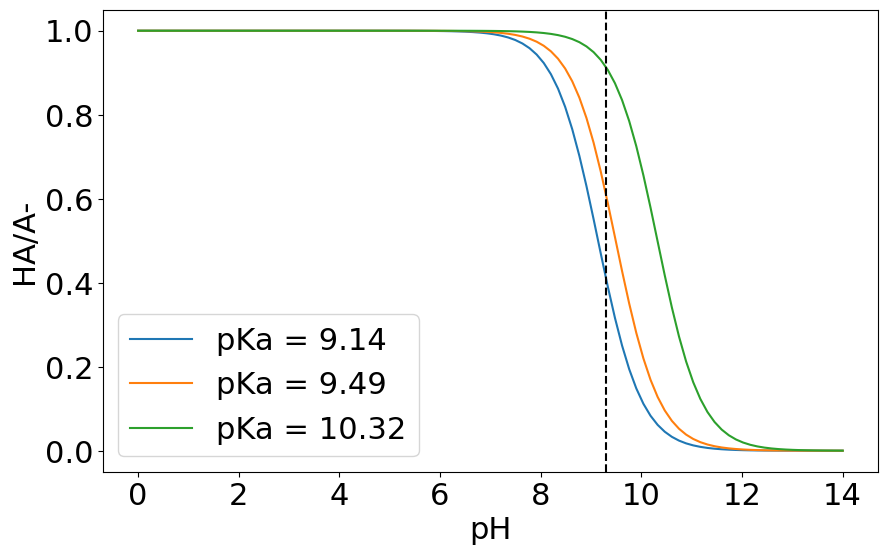

In [10]:
pka_to_plot = [9.14, 9.49, 10.32]
fig, ax = plt.subplots(figsize=(10, 6))

lines = plot_bjerum_diagram(pka_to_plot, ax)
ax.axvline(x=9.3, color="black", linestyle="--", label="pH = 9.3")

#### d) Forslå en opskrift på bufferen. 

____

Vi bruger borsyre med pKa = 9,14.

$$m(Borsyre) = 61,83 g/mol $$
$$ pH = pKa + log_{10}(\frac{[A^-]}{[HA]})$$
$$ 9,3 = 9,14 + log_{10}(\frac{[A^-]}{[HA]})$$
$$ \frac{[A^-]}{[HA]} = 10^{9,3 - 9,14} = 1,45$$

$$[Borsyre] = 0,050 M$$
$$[A^-] = 1,45 * [HA]$$
$$[A^-] = 1,45 * 0,050 = 0,0725 M$$
$$Total = 0,050 + 0,0725 = 0,1225 M$$

For 1 liter buffer skal vi bruge:
$0,1225M$ Borsyre og $0,0725M$ NaOH for at reageare til den korresponderende base ($73mL \:1M\: NaOH$)
___

#### e) klokken
Trivielt

### Opgave 3) Termodynamik og kinetik - 30 point

I har denne afstemte reaktion: 
$$2butadiene(g) = \text{4-vinyl-1-cyclohexene}(g)$$

2butadiene(g) ↔ 4-vinyl-1-cyclohexene(g)

Og I har bestemt disse data:

ΔH(butadiene) = 110 kJ/mol, 

ΔS(butadiene) = 199 J/mol·K  

ΔH(4-vinyl-1-cyclohexene) = 69,5 kJ/mol 

ΔS(4-vinyl-1-cyclohexene) = 310.45 J/mol·K  

| T [°C] | 326  | 342  | 370  | 388  |
|--------|-------|-------|-------|-------|
| 10⁵ k [torr⁻¹·min⁻¹] | 2,50  | 4,15  | 10,0  | 17,5  |

Bemærk at tallene er i tabellen er 10⁵ ganget med k, altså er k tallet divideret med 10⁵.


#### a) klokken
Trivielt

#### b) Opskriv funktionen for ΔG(T)

___
$$\Delta G = \Delta H - T\Delta S$$

$$\Delta H = 69.5 kJ/mol - 2 * 110 kJ/mol = -150.5 kJ/mol$$

$$\Delta S = 310.45 J/mol·K - 2 * 199 J/mol·K = -87.55 J/mol·K$$

$$\Delta G = -150.5 kJ/mol - T * (-87.55 J/mol·K)$$
___

#### c) Omregn hastighedskonstanten til M og s. 

___
$$ Molar = \frac{mol}{L} \rightarrow \frac{n}{V}$$

$$ P = \frac{n}{V}RT$$

$$ \frac{n}{V} = \frac{P}{RT} = C $$

$$ R = 62.364 \frac{L·torr}{K·mol}$$

$$ M = \frac{1 torr}{T * R} \rightarrow M^{-1} = \frac{R*T}{1 torr}$$

$$ k[\frac{1}{M s}] = k[\frac{1}{torr \: min}]  * \frac{R * T}{60}$$

$$ \frac{1}{M \: s} = \frac{1}{torr \: min} * \frac{L * torr}{K * mol} * K * \frac{min}{sec} = \frac{L}{mol} * \frac{1}{sec}$$




In [82]:
M_func = lambda T: 62.364 * T
temps = [326, 342, 370, 388]
temps_kelvin = [T + 273.15 for T in temps]
k = [2.5e-5, 4.15e-5, 1e-4, 1.75e-4]
scalers = [M_func(T) for T in temps_kelvin]

simple_dict = dict(
    temps=temps, temps_kelvin=temps_kelvin, k_torr_min=k, scalers_M_min=scalers
)
df = pd.DataFrame(simple_dict)

df["k_M_min"] = df["k_torr_min"] * 1 / df["scalers_M_min"]
df["k_M_sec"] = df["k_M_min"] * 1 / 60
df["ln(k_M_sec)"] = np.log(df["k_M_sec"])
df["Delta_G"] = -150.5 - df["temps_kelvin"] * (-87.55 / 1000)
df

,temps,temps_kelvin,k_torr_min,scalers_M_min,k_M_min,k_M_sec,ln(k_M_sec),Delta_G
0,326,599.15,0.000025,37365.3906,6.690683e-10,1.115114e-11,-25.219479,-98.044418
1,342,615.15,0.000041,38363.2146,1.081765e-09,1.802942e-11,-24.739016,-96.643618
2,370,643.15,0.000100,40109.4066,2.493181e-09,4.155301e-11,-23.904051,-94.192217
3,388,661.15,0.000175,41231.9586,4.244281e-09,7.073801e-11,-23.372038,-92.616318


#### d) bestem aktiveringsenergien for reaktionen, der må bruges én graf i besvarelsen

Activation energy: 98.12 kJ/mol


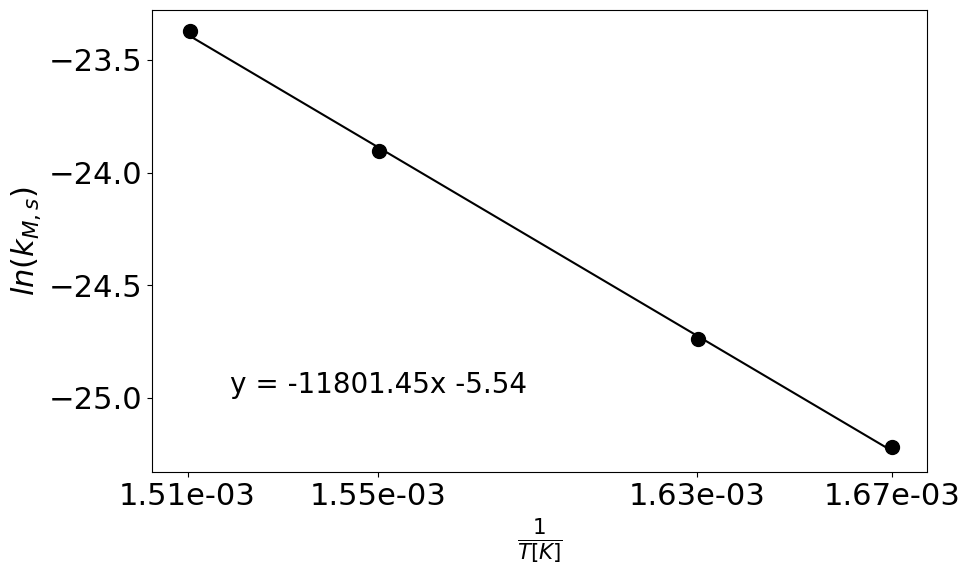

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))
x = 1 / df["temps_kelvin"]
y = df["ln(k_M_sec)"]

linear_fit = np.polyfit(x, y, 1)
ax.plot(x, np.polyval(linear_fit, x), color="black", label="linear fit")
ax.scatter(np.round(x.values, 6), y, s=100, color="black")
# Lower the decimal places to 2 for the x axis and lower font size
ax.xaxis.set_major_formatter("{:.2e}".format)
ax.set_xticks(x)
text = f"y = {linear_fit[0]:.2f}x {linear_fit[1]:.2f}\n"

ax.text(0.1, 0.1, text, fontsize=20, transform=ax.transAxes)
ax.set_xlabel(r"$\frac{1}{T[K]}$")
ax.set_ylabel(r"$ln(k_{M,s})$")

R = 8.3145
Ea = -linear_fit[0] * R / 1000
print(f"Activation energy: {Ea:.2f} kJ/mol")

#### e) Opskriv et reaktionskoordinat med angivelse af ΔG og EA, der må bruges én graf i besvarelsen.

In [80]:
df["Delta_G"].mean()

-95.3741425

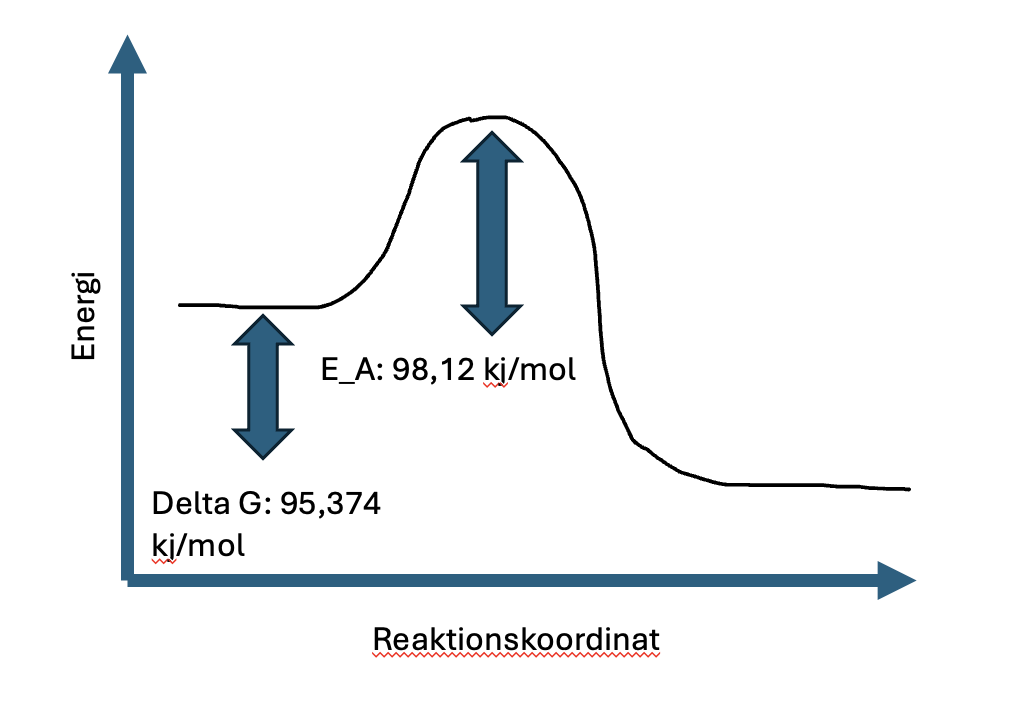

#### f) Angiv usikkerhed på ΔG i det temperaturinterval EA er bestemt i.

In [90]:
print("Delta G over temp", df["Delta_G"].values)
print("Standard variation", df["Delta_G"].std())

Delta G over temp [-98.0444175 -96.6436175 -94.1922175 -92.6163175]
Standard variation 2.4320417202767457


#### g) Klokke
Trivielt

### Opgave 4) Elektrokemi - 22 point
For redoxreaktionen:

$$ Fe^{2+}(aq) + O_2(g) = Fe^{3+}(aq) + H_2O(l)$$

#### a) Klokke
Trivielt


#### b) Afstem reaktion


___
$$ 4H^+ + 4Fe^{2+} + O_2 = 4Fe^{3+} + 2H_2O$$
___

#### c) Opskriv ligevægtsbrøken for reaktionen. 

____
$$ K = \frac{[Fe^{3+}]^4[H_2O]^2}{[H^+]^4[Fe^{2+}]^4 \rho (O_2)}$$
___

#### d) Beregn cellepotentialet.

____
$$ Fe^{3+} + e^- = Fe^{2+} ; E_{red} = -0,771 V$$
$$ O_2 + 4H^+ + 4e^- = 2H_2O ; E_{red} = 1,229 V$$

$$E_{cell} = E_{red} - E_{ox} = 1,229 - (-0,771) = 2,000 V$$
___

#### e) Tegn et galvanisk element bestående af de to halvceller. 

___
Start med at definere halv cellerene (dem vi lige har fundet) og sæt dem op i en celle. Husk jeres reaktions metal


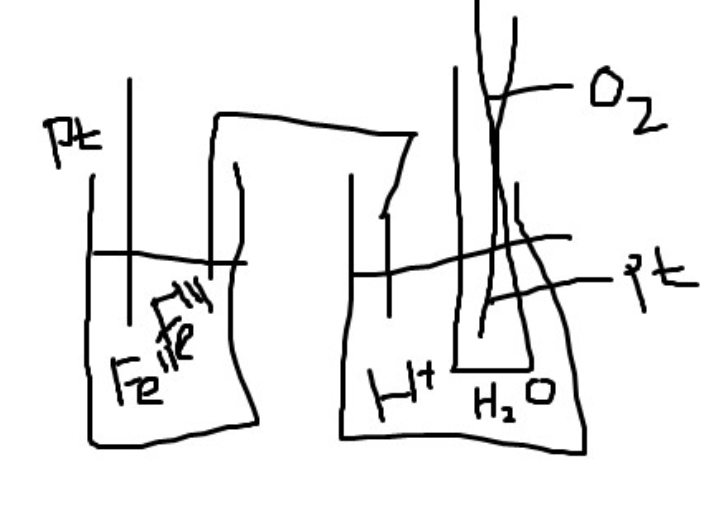

___

#### f) Hvad er den elektromotorisk kraft i et element med [Fe2+] = 0,020 M, [Fe3+] = 0,050 M, [H+] = 0,10 M og p(O2) = 0,20 bar. 

___
$$ E = E_{red} - \frac{RT}{nF}lnK$$

$$ E = 2 - \frac{(8,314 J/mol·K)(298 K)}{(4 * 96485 C/mol)}lnK$$

$$ln(k) = ln(\frac{[Fe^{3+}]^4[H_2O]^2}{[H^+]^4[Fe^{2+}]^4 \rho (O_2)}) = ln(\frac{(0,050)^4 * 1}{(0,10)^4 * (0,020)^4 * 0,20}) = 14.48$$

$$ E = 2 - \frac{(8,314 J/mol·K)(298 K)}{(4 * 96485 C/mol)} * 14.48$$

$$ E = 2 - 0,00642 * 14.48 = 1,90 V$$
___

#### g) Beregn ΔGꝋ for reaktionen og ΔG ved pH = 7

___
$$\Delta G = -nFE$$

$$\Delta G = -4 * 96485 C/mol * 2 V = -771800 J/mol = -772 kJ/mol$$

$$pH = 7 \rightarrow [H^+] = 10^{-7}$$

Antager samme koncentrationer som oven for, bruger vi 

$$ E = E_{red} - \frac{RT}{nF}lnQ$$

$$ lnQ = ln(\frac{[Fe^{3+}]^4[H_2O]^2}{[H^+]^4[Fe^{2+}]^4 \rho (O_2)}) = ln(\frac{(0,050)^4 * 1}{(10^{-7})^4 * (0,020)^4 * 0,20}) = 69,747$$

$$ E = 2 - 0,00642 * 69,747 = 1.55V$$

$$ \Delta G(pH=7) = -4 * 96485 C/mol * 1.55 V = -598207 J/mol = -598 kJ/mol$$

#### h) Argumenter for hvorvidt jern(II) eller jern(III) er stabil på jordens overflade. 

___ 
Begge ΔG er MEGET store, derfor vil Jern være oxideret til Jern(III) på jordens overflade
___

#### i) Trivielt
Klokke

Tak for denne gang, held og lykke med eksamen

-Steen Bender